In [1]:
import pandas

import swasputils

In [2]:
zoo_subjects = swasputils.ZooniverseSubjects()

C:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


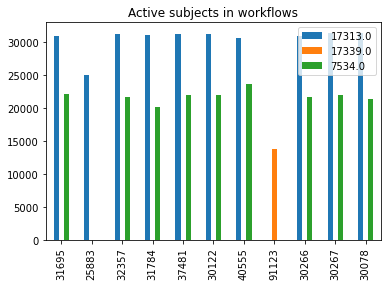

In [3]:
sets_in_workflows = set()
for workflow_id, wf_subjects in zoo_subjects.workflows.items():
    sets_in_workflows |= set(wf_subjects.subject_sets)

workflow_counts = {}
for workflow_id, wf_subjects in zoo_subjects.workflows.items():
    workflow_counts[workflow_id] = []
    for set_id in sets_in_workflows:
        subjects = wf_subjects.get_subject_set(set_id)
        workflow_counts[workflow_id].append(len(subjects.df[subjects.df['retired_at'].isna()]))

pandas.DataFrame(
    workflow_counts,
    index=list(sets_in_workflows)
).plot.bar( 
    title='Active subjects in workflows',
)